# **California Housing Price Regression Analysis**
Please get the data from - [GitHub Repository](https://github.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/blob/master/data/California%20Housing.txt)

## **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install contextily
import contextily as ctx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 72.2 MB/s eta 0:00:00


## **Loading Data**

In [ ]:
url = "https://raw.githubusercontent.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/master/data/California%20Housing.txt"
data = pd.read_csv(url, sep = ',')

**"This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.**

**This dataset appeared in a 1997 paper titled 'Sparse Spatial Autoregressions' by Pace, R. Kelley, and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (typically having a population of 600 to 3,000 people)."**

Quoted from: [GitHub Repository](https://github.com/ageron/handson-ml2/tree/master/datasets/housing)

- **longitude**: A measure of how far west a house is; a higher value indicates a location farther west.
- **latitude**: A measure of how far north a house is; a higher value indicates a location farther north.
- **housingMedianAge**: Median age of a house within a block; a lower number indicates a newer building.
- **totalRooms**: Total number of rooms within a block.
- **totalBedrooms**: Total number of bedrooms within a block.
- **population**: Total number of people residing within a block.
- **households**: Total number of households (a group of people residing within a home unit) for a block. A household is a group of people residing within a home.
- **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars).
- **medianHouseValue**: Median house value for households within a block (measured in US Dollars).


In [ ]:
new_column_names = {
    "longitude": "Longitude",
    "latitude" : "Latitude",
    "housingMedianAge" : "MedianHouseAge",
    "totalRooms": "TotalRooms",
    "totalBedrooms": "TotalBedrooms",
    "population": "Population",
    "households": "Households", # A household is a group of people residing within a home (for example 4 people living inside a hostel having three rooms)
    "medianIncome" : "MedianIncome",
    "medianHouseValue" : "MedianHouseValue"
}

data.rename(columns = new_column_names, inplace = True)
data

,Longitude,Latitude,MedianHouseAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
(data['Latitude'] == 37.88).sum()

53

## **Data Shape**

In [ ]:
data.shape

(20640, 9)

## **Data Head**

In [ ]:
data.head()

,Longitude,Latitude,MedianHouseAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


## **Data Tail**

In [ ]:
data.tail()

,Longitude,Latitude,MedianHouseAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0


## **Data Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         20640 non-null  float64
 1   Latitude          20640 non-null  float64
 2   MedianHouseAge    20640 non-null  float64
 3   TotalRooms        20640 non-null  float64
 4   TotalBedrooms     20640 non-null  float64
 5   Population        20640 non-null  float64
 6   Households        20640 non-null  float64
 7   MedianIncome      20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## **Unique Values in Each Column**

In [ ]:
print(data.nunique())

Longitude             844
Latitude              862
MedianHouseAge         52
TotalRooms           5926
TotalBedrooms        1928
Population           3888
Households           1815
MedianIncome        12928
MedianHouseValue     3842
dtype: int64


## **Null Values in Each Column**

In [ ]:
print(data.isnull().sum())

Longitude           0
Latitude            0
MedianHouseAge      0
TotalRooms          0
TotalBedrooms       0
Population          0
Households          0
MedianIncome        0
MedianHouseValue    0
dtype: int64


## **Percentage of Null Values in Each Column**

In [ ]:
print((data.isnull().sum()/len(data))*100)

Longitude           0.0
Latitude            0.0
MedianHouseAge      0.0
TotalRooms          0.0
TotalBedrooms       0.0
Population          0.0
Households          0.0
MedianIncome        0.0
MedianHouseValue    0.0
dtype: float64


## **Number of Duplicate Records in Each Column**

In [ ]:
duplicate_values = data[data.duplicated()]
duplicate_values

,Longitude,Latitude,MedianHouseAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue


In [ ]:
(data.duplicated()).sum()

0

**There are no instances of duplicate values in this dataset**

## **Finding Out Zero Values and Negative Values Per Column**

This analysis is done for two main reasons:



1.   To check if there are values mentioned as ZERO and might behave abnormally. This is important to check because even if there are no NA values, these zeros can cause problem.
2.   To check if there are negative values in attributes where megative values are not possible.



In [ ]:
problem_cols = []

for col in data.columns:
  if (data[col] == 0).any() or (data[col] < 0).any():
    problem_cols.append(col)

summary = pd.DataFrame(index = problem_cols,
                       columns = ['Zero Count',
                                  'Negative Count',
                                  'Percentage Zeros',
                                  "Percentage Negatives"])

for col in problem_cols:
  summary.loc[col, 'Zero Count'] = (data[col] == 0).sum()
  summary.loc[col, 'Negative Count'] = (data[col] < 0).sum()
  summary.loc[col, 'Percentage Zeros'] = (data[col] == 0).mean()*100
  summary.loc[col, 'Percentage Negatives'] = (data[col] < 0).mean()*100

summary

,Zero Count,Negative Count,Percentage Zeros,Percentage Negatives
Longitude,0,20640,0.0,100.0




1.   **It can be interpreted that only the 'Longitude' column has all values as negative and no other column has any value as negative or zero.**
2.   **The negative nature of the Longitude is not unnatural.** Values increase in the positive direction as we move east of the `Prime Meridian`. Similary, values decrease in the negative direction as we move west of the `Prime Meridian`.

## **Descriptive Statistics**

In [ ]:
data.describe()

,Longitude,Latitude,MedianHouseAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## **Univariate Analysis (Histograms)**

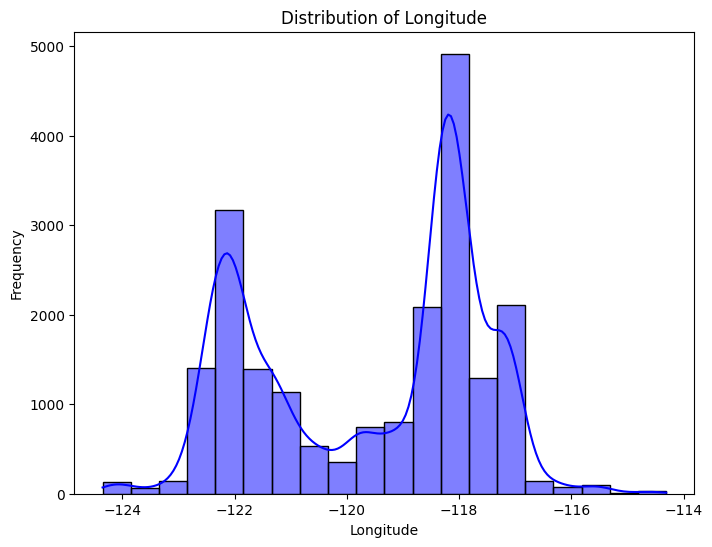

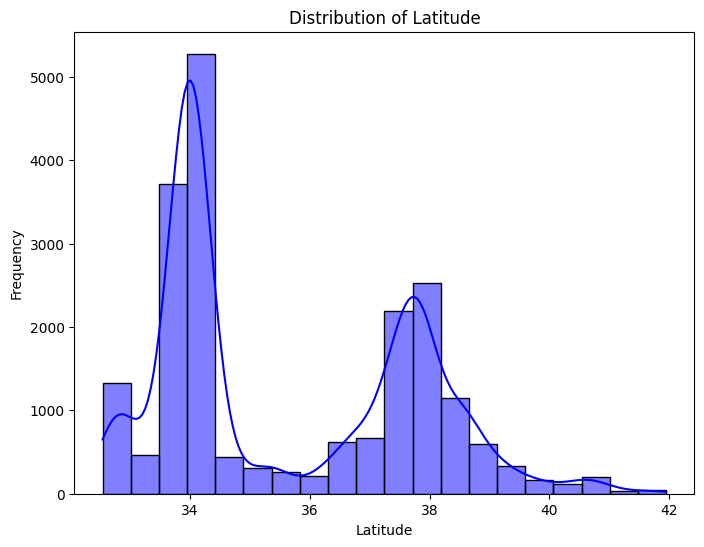

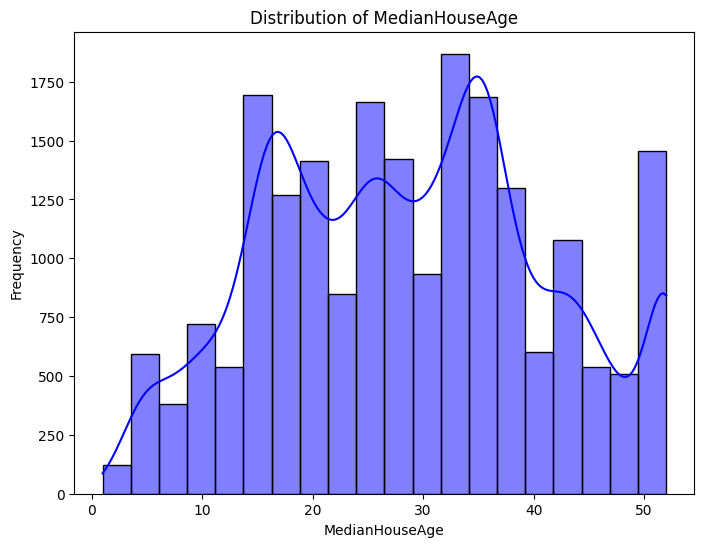

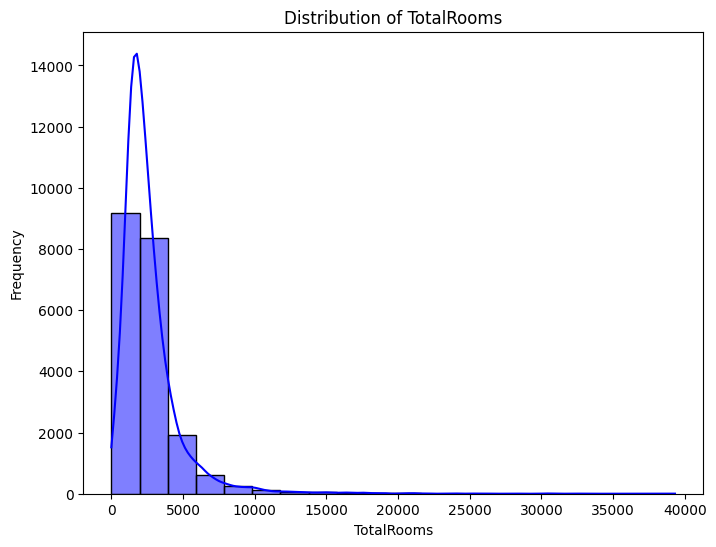

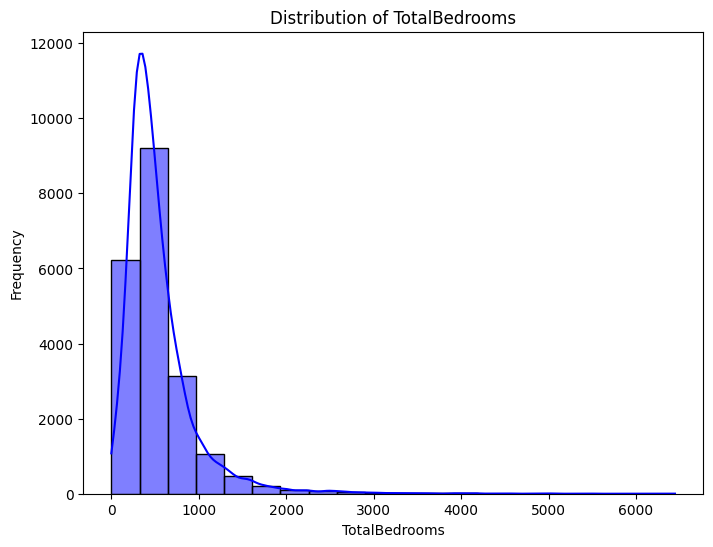

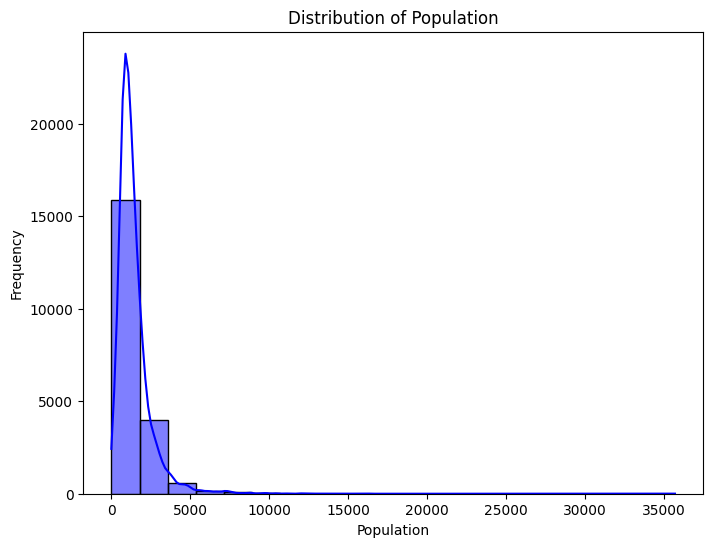

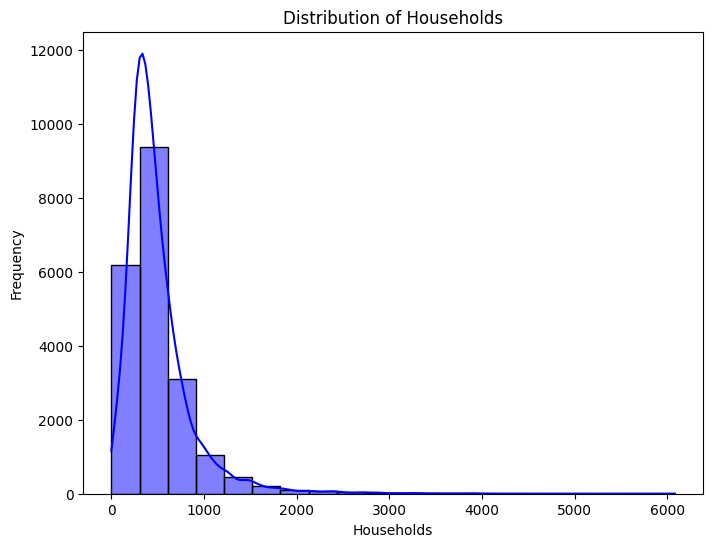

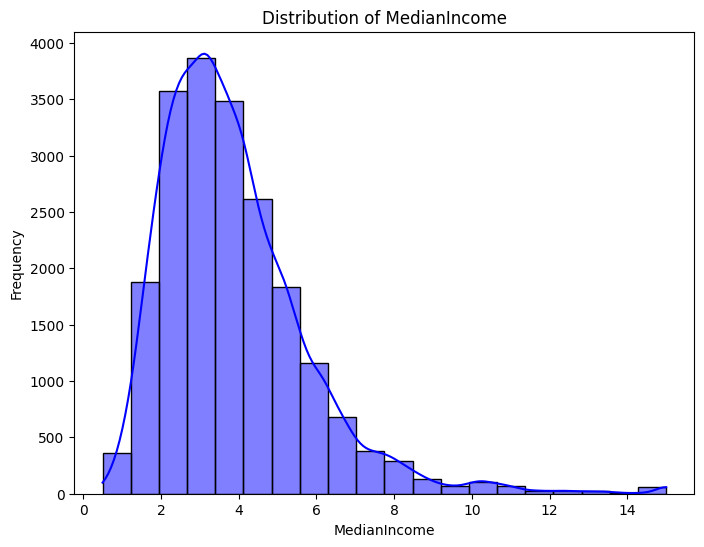

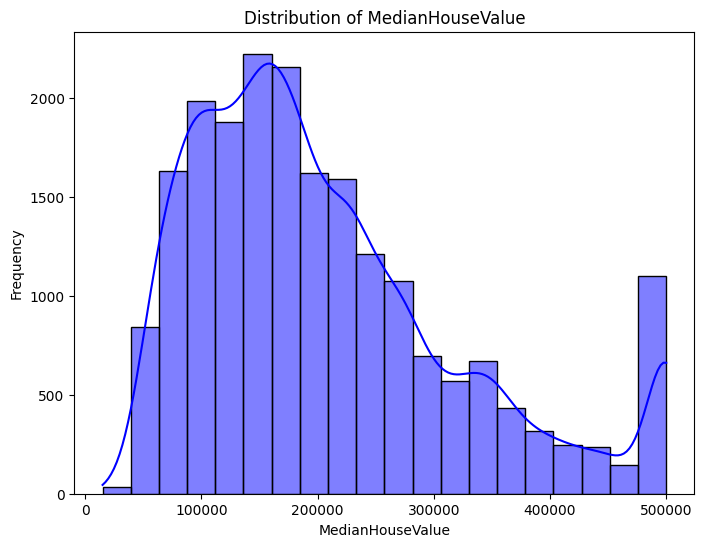

In [ ]:
features = ['Longitude', 'Latitude', 'MedianHouseAge', 'TotalRooms',
            'TotalBedrooms', 'Population', 'Households', 'MedianIncome', 'MedianHouseValue']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=20, kde=True,
                 color='blue', edgecolor="black")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## **Scatter Plot with Color Coding**
- This map shows the locations of the census blocks scattered across the area of the state of California.
- The color coding denotes the median prices of the houses in those locations.


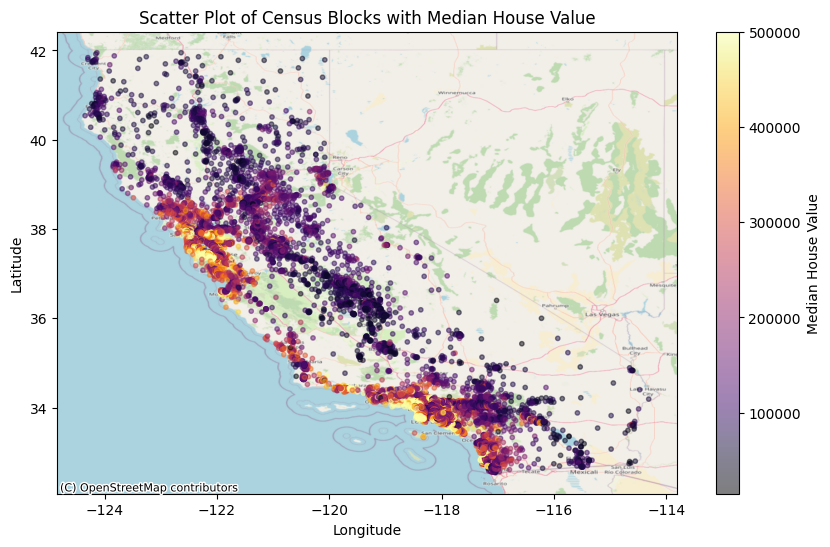

In [ ]:
# Calculate the minimum and maximum values of the feature
vmin = data['MedianHouseValue'].min()
vmax = data['MedianHouseValue'].max()

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Longitude'], data['Latitude'], c=data['MedianHouseValue'], cmap='inferno', alpha=0.5, s=10, vmin=vmin, vmax=vmax)
plt.colorbar(scatter, label='Median House Value')
plt.title('Scatter Plot of Census Blocks with Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add the basemap
ctx.add_basemap(plt.gca(), crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

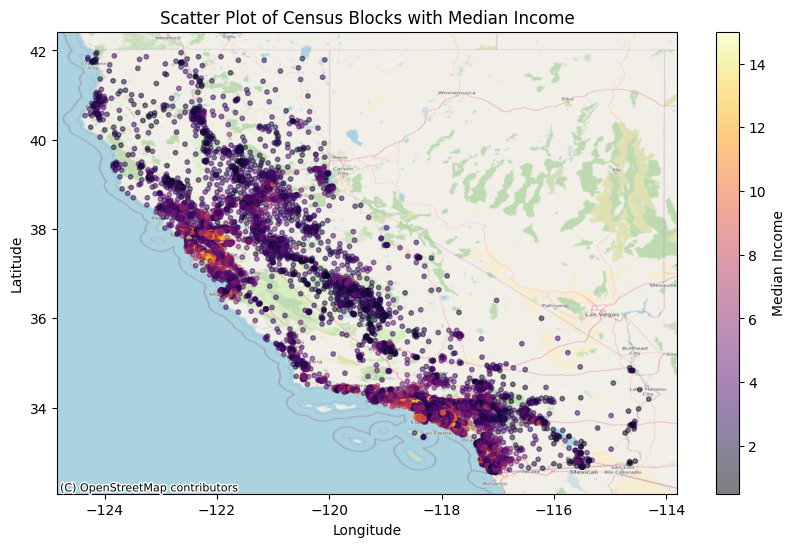

In [ ]:
# Calculate the minimum and maximum values of the feature
vmin = data['MedianIncome'].min()
vmax = data['MedianIncome'].max()

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Longitude'], data['Latitude'], c=data['MedianIncome'], cmap='inferno', alpha=0.5, s=10, vmin=vmin, vmax=vmax)
plt.colorbar(scatter, label='Median Income')
plt.title('Scatter Plot of Census Blocks with Median Income')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add the basemap
ctx.add_basemap(plt.gca(), crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

## **Univariate Analysis (Boxplots)**

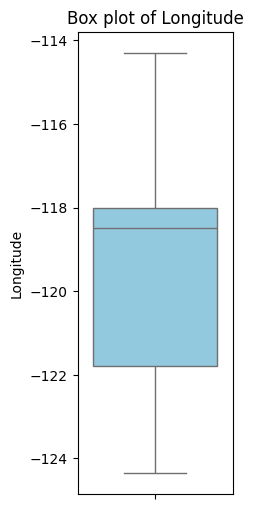

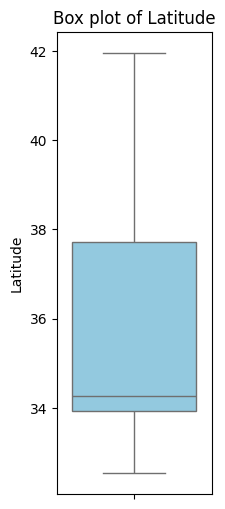

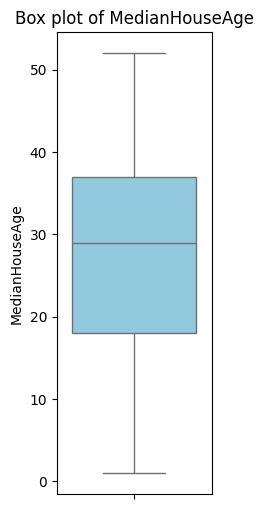

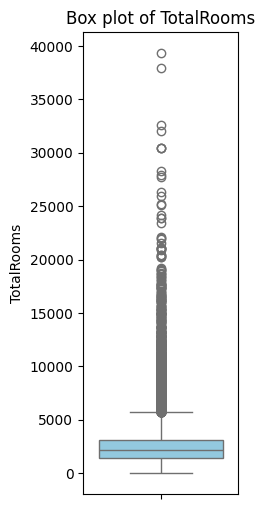

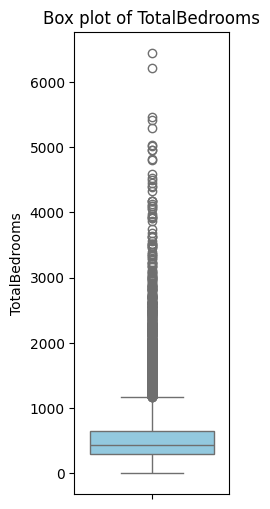

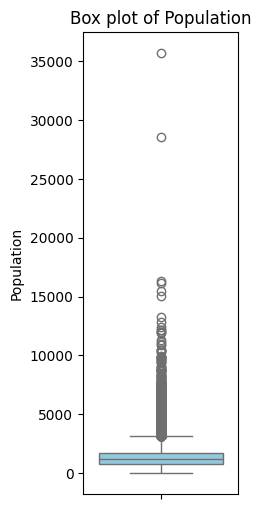

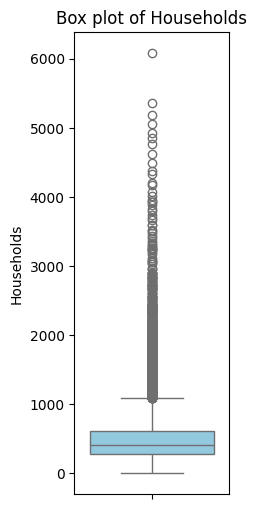

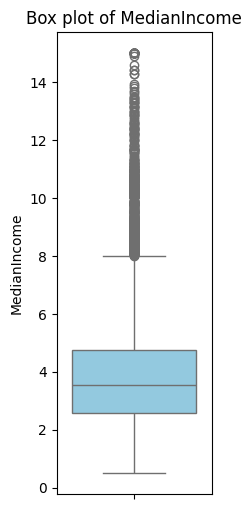

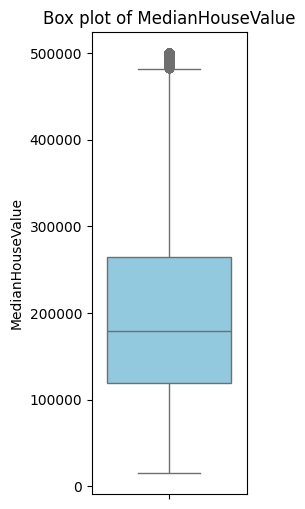

In [ ]:
features = ['Longitude', 'Latitude', 'MedianHouseAge', 'TotalRooms',
            'TotalBedrooms', 'Population', 'Households', 'MedianIncome', 'MedianHouseValue']

for feature in features:
  plt.figure(figsize = (2,6))
  sns.boxplot(y = data[feature], color = 'skyblue')
  plt.title(f"Box plot of {feature}")
  plt.ylabel(feature)
  plt.show()

## **Bivariate Analysis (Scatter Plots)**

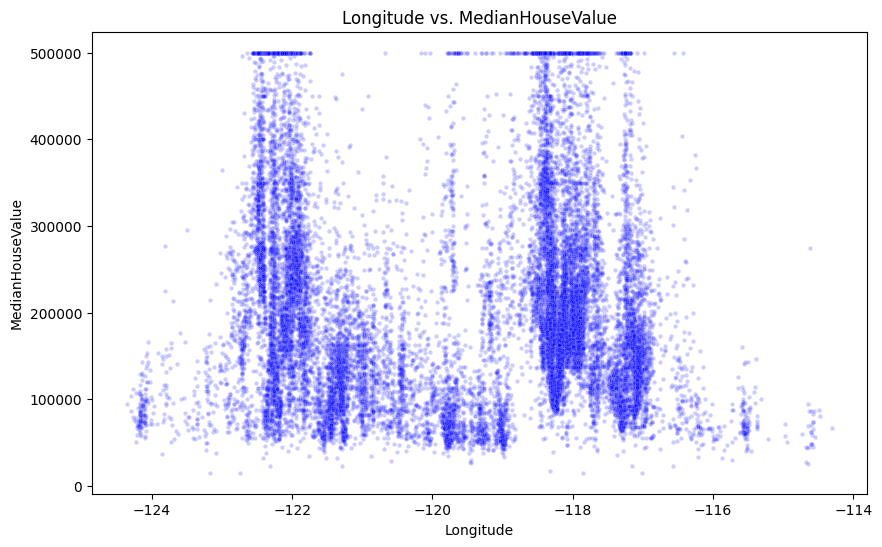

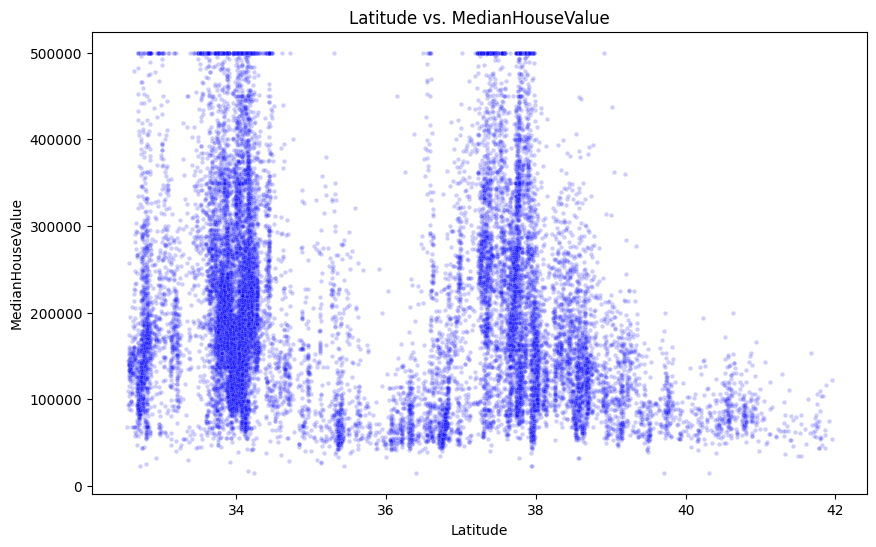

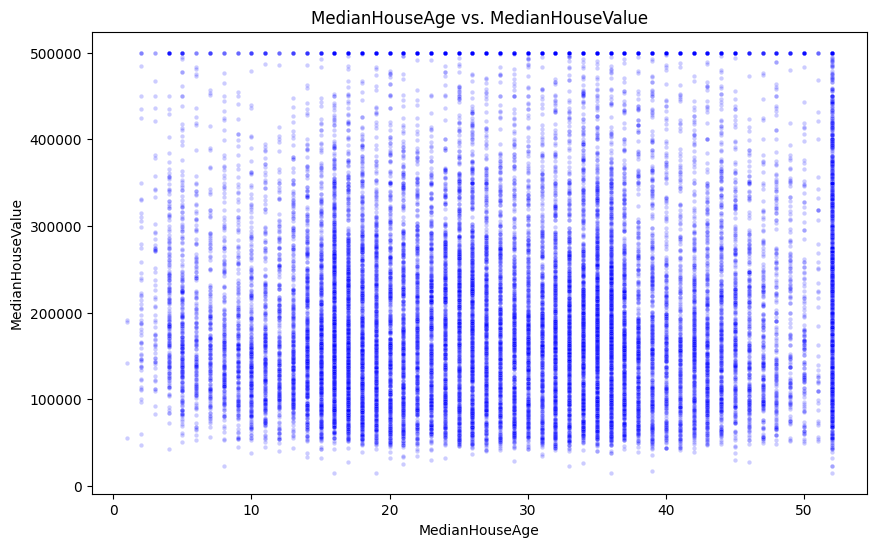

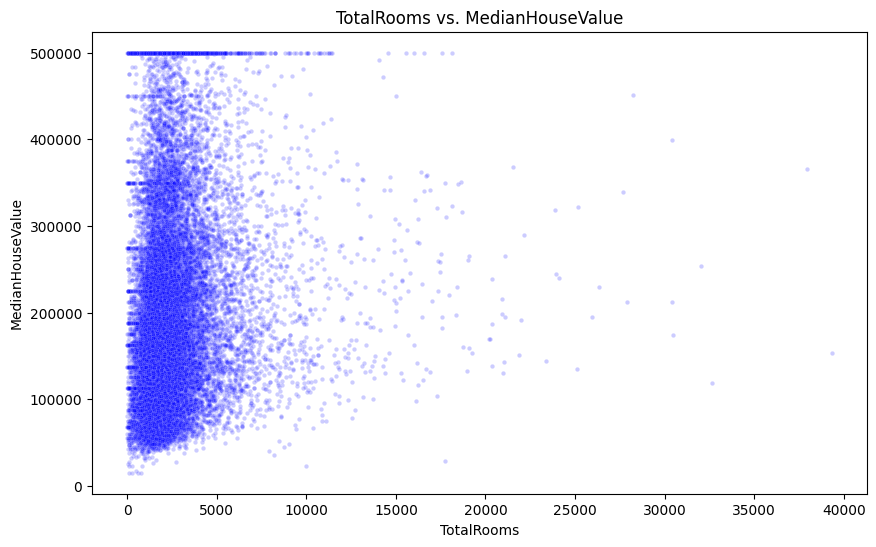

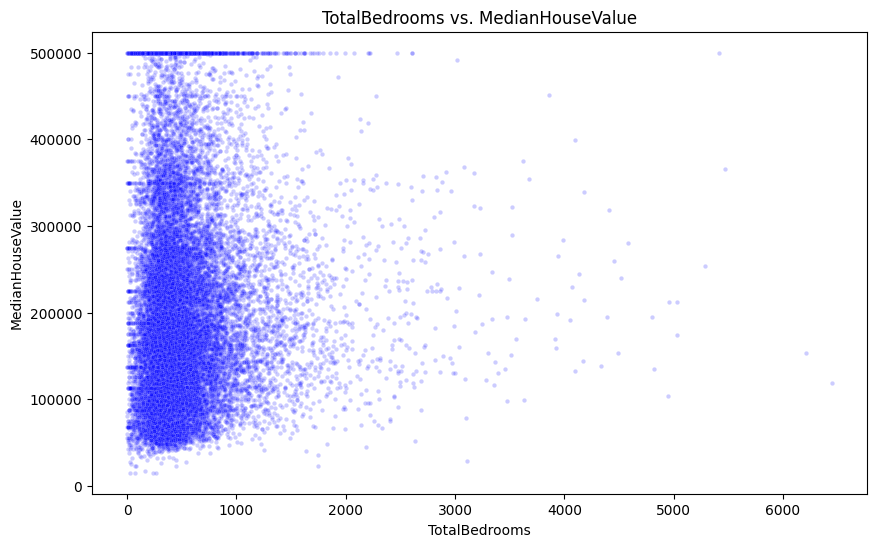

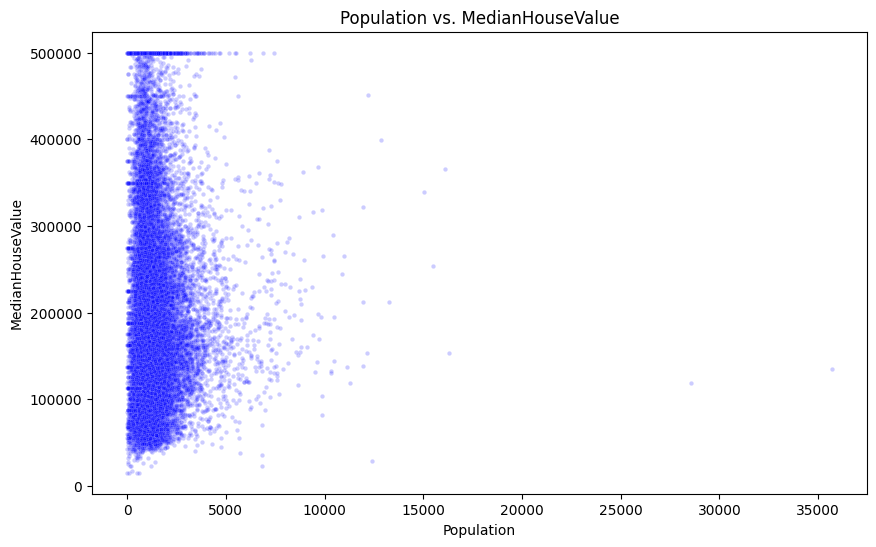

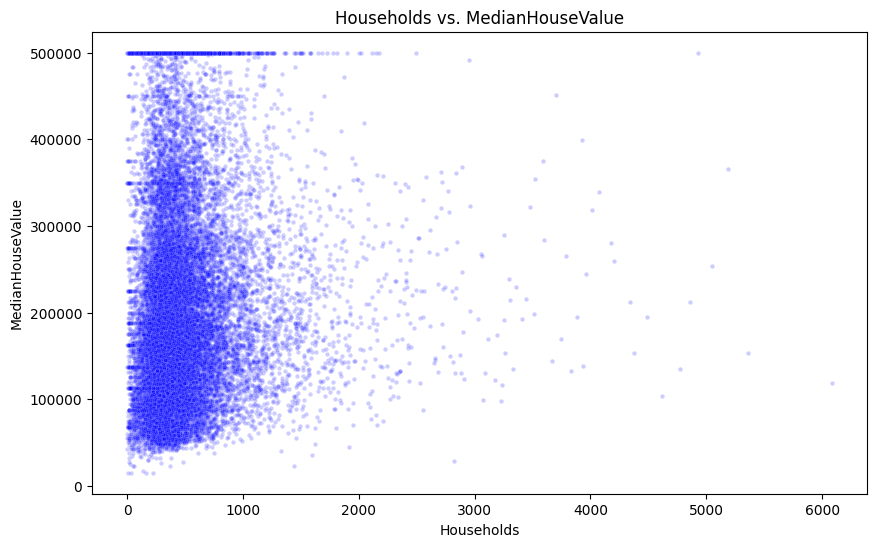

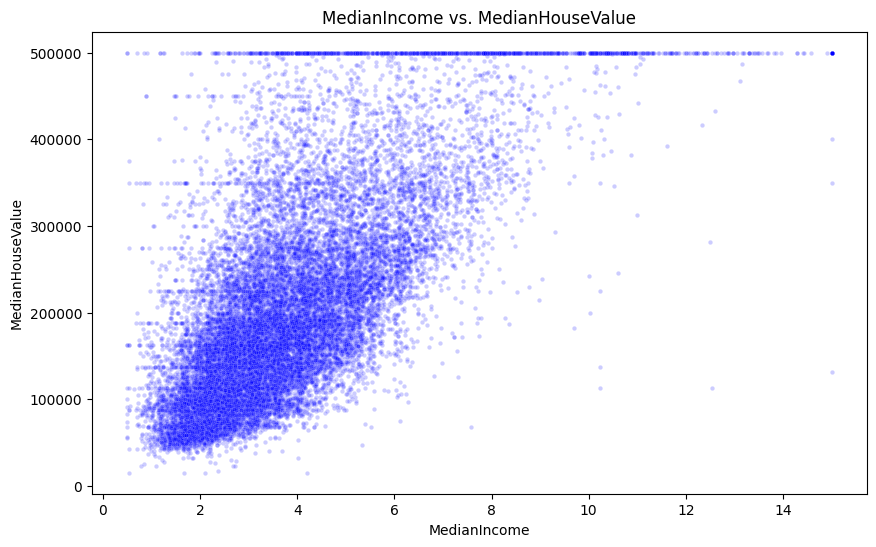

In [ ]:
features = ['Longitude', 'Latitude', 'MedianHouseAge', 'TotalRooms',
            'TotalBedrooms', 'Population', 'Households', 'MedianIncome']

target = 'MedianHouseValue'

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data[target], color='blue', alpha = 0.2, s = 10)
    plt.title(f'{feature} vs. {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

## **Multivariate Analysis (Correlation Matrix)**

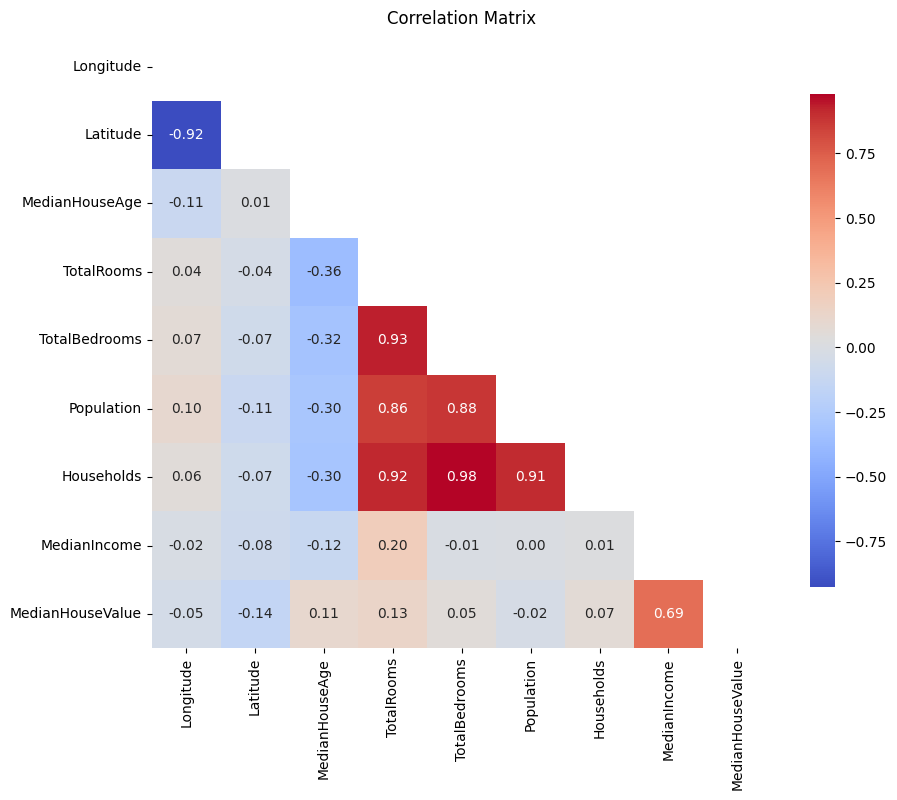

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## **Outlier Handling**

In [ ]:
def remove_outliers_iqr(df, columns):
  for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

columns_to_check = ['Longitude', 'Latitude', 'MedianHouseAge', 'TotalRooms',
                    'TotalBedrooms', 'Population', 'Households', 'MedianIncome']

data = remove_outliers_iqr(data.copy(), columns_to_check)

print("Shape of the data frame after the outlier removal is:", data.shape)

Shape of the data frame after the outlier removal is: (17540, 9)


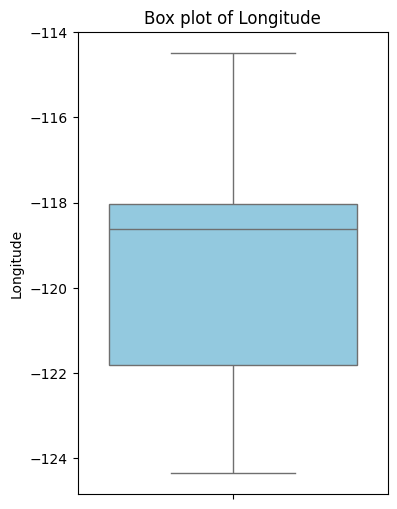

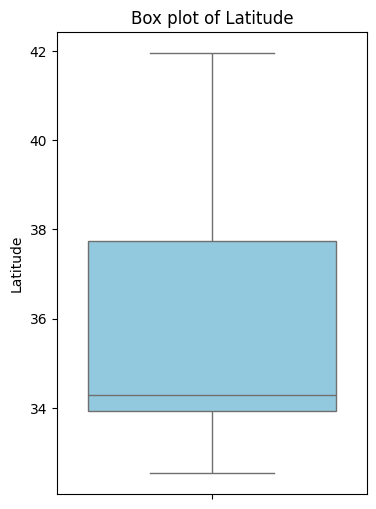

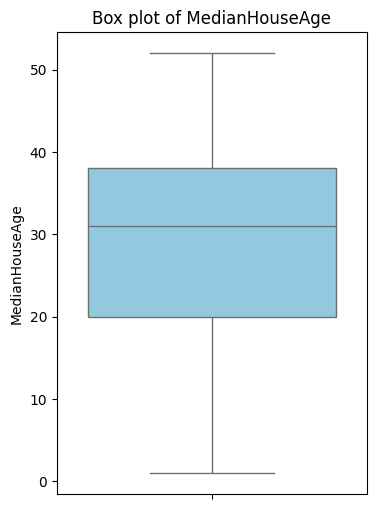

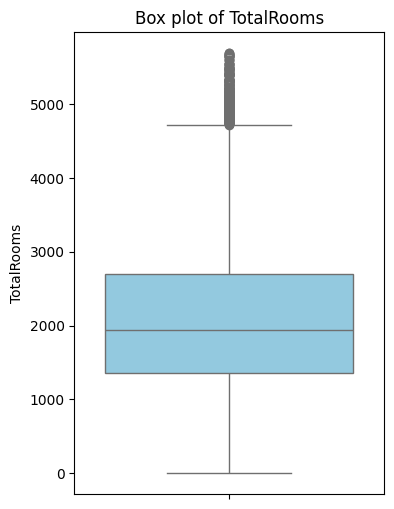

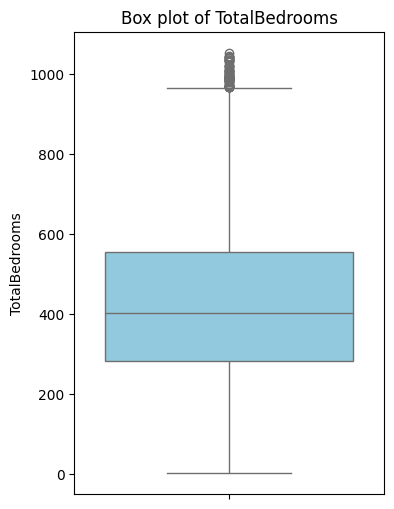

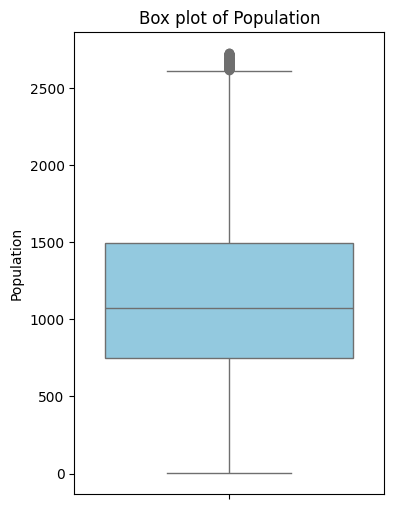

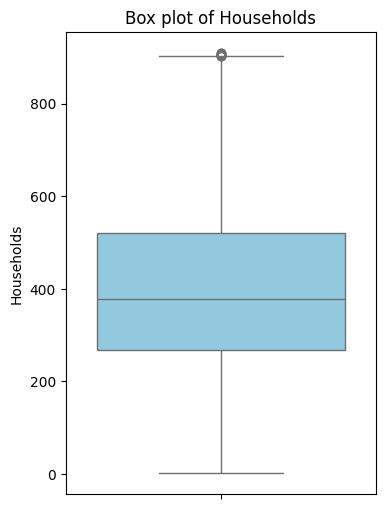

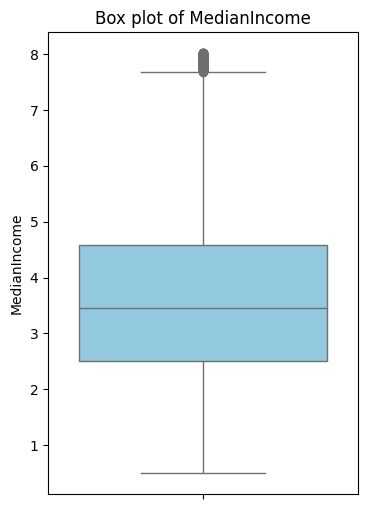

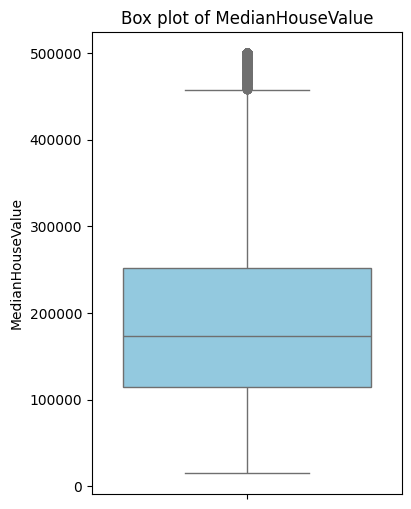

In [ ]:
features = ['Longitude', 'Latitude', 'MedianHouseAge', 'TotalRooms',
            'TotalBedrooms', 'Population', 'Households', 'MedianIncome', 'MedianHouseValue']

for feature in features:
  plt.figure(figsize = (4,6))
  sns.boxplot(y = data[feature], color = 'skyblue')
  plt.title(f"Box plot of {feature}")
  plt.ylabel(feature)
  plt.show()

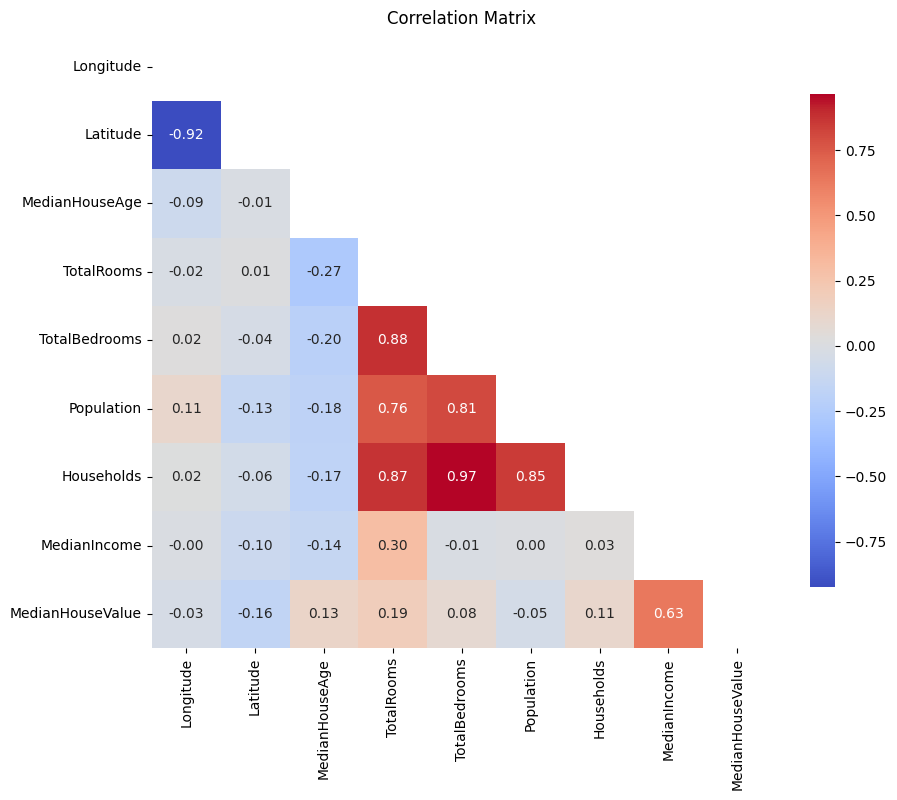

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## **Standardisation**

In [ ]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Longitude', 'Latitude', 'MedianHouseAge', 'TotalRooms',
       'TotalBedrooms', 'Population', 'Households', 'MedianIncome',
       'MedianHouseValue']

scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('MedianHouseValue', axis = 1)
y = data['MedianHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


## **Making the ML models**

In [ ]:
# LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Support Vector Regressor
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

## **Making Predictions from the ML models**

In [ ]:
y_pred_linear = linear_model.predict(X_test)

y_pred_svr = svr_model.predict(X_test)

## **Evaluating the predictions**

In [ ]:
# Linear Regression Predictions
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# SVR Predictions
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the results
print("Linear Regression Results:\n")
print({
    "MAE:" : mae_linear,
    "MSE:" : mse_linear,
    "R2 Score:" : r2_linear
})

print("\n--------------------------------------------------------------\n")

print("SVR Results:\n")
print({
    "MAE:" : mae_svr,
    "MSE:" : mse_svr,
    "R2 Score:" : r2_svr
})

Linear Regression Results:

{'MAE:': 0.4431533691097679, 'MSE:': 0.36938570335462684, 'R2 Score:': 0.6246548578993616}

--------------------------------------------------------------

SVR Results:

{'MAE:': 0.33241264951537397, 'MSE:': 0.24875946935995918, 'R2 Score:': 0.7472272003820536}


## **SVR Hyperparameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'epsilon': [0.1, 0.5, 1]}

# Create a GridSearchCV object (using SVR and your chosen scoring metric)
grid = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to your training data
grid.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid.best_params_)
print("Best score:", -grid.best_score_)

# Get the best model
best_svr_model = grid.best_estimator_

Best parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Best score: 0.23033196136310402


## **Making Predictions and Evaluating Results using this best SVR model**

In [ ]:
best_svr_model.fit(X_train, y_train)
y_best_svr_pred = best_svr_model.predict(X_test)

# Best SVR Predictions
mae_best_svr = mean_absolute_error(y_test, y_best_svr_pred)
mse_best_svr = mean_squared_error(y_test, y_best_svr_pred)
r2_best_svr = r2_score(y_test, y_best_svr_pred)

print("Best SVR Results:\n")
print({
    "MAE:" : mae_best_svr,
    "MSE:" : mse_best_svr,
    "R2 Score:" : r2_best_svr
})

Best SVR Results:

{'MAE:': 0.3168911298835264, 'MSE:': 0.23070453725574025, 'R2 Score:': 0.7655734195094608}


## **Custom Sequential ANN with 'mae' loss function**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

# Define the R-squared metric
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Create the ANN model
model1 = Sequential()
model1.add(Dense(32, activation = 'relu', input_shape =(8,)))
model1.add(Dense(16, activation = 'relu'))
model1.add(Dense(1))

# Compile the model with the custom R-squared metric
model1.compile(optimizer = 'adam', loss = 'mae', metrics = ['mae', 'mse', r2_score])

# Train the model
history1 = model1.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5357 - mae: 0.5357 - mse: 0.5468 - r2_score: 0.4196 - val_loss: 0.4214 - val_mae: 0.4214 - val_mse: 0.3779 - val_r2_score: 0.6238
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4100 - mae: 0.4100 - mse: 0.3470 - r2_score: 0.6356 - val_loss: 0.4051 - val_mae: 0.4051 - val_mse: 0.3375 - val_r2_score: 0.6609
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3859 - mae: 0.3859 - mse: 0.3051 - r2_score: 0.6739 - val_loss: 0.3875 - val_mae: 0.3875 - val_mse: 0.3285 - val_r2_score: 0.6718
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3723 - mae: 0.3723 - mse: 0.2918 - r2_score: 0.6825 - val_loss: 0.3764 - val_mae: 0.3764 - val_mse: 0.3042 - val_r2_score: 0.6940
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3622 - mae: 0.3622 - mse: 0.2792 - r2_score: 0.6970 - val_loss: 0.3704 - val_mae: 0.3704 - val_mse: 0.2994 - val_r2_score: 0.6987
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

## **Calculation of Evaluation Metrics**

In [ ]:
loss1, mae1, mse1, r2_score1 = model1.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss1:.4f}, MAE: {mae1:.4f}, MSE: {mse1:.4f}, R2 Score: {r2_score1:.4f}')

Test Loss: 0.2975, MAE: 0.2975, MSE: 0.2160, R2 Score: 0.7628


## **Making Predictions**

In [ ]:
y_pred_ann_mae = model1.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## **Custom Sequential ANN with 'mse' loss function**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

# Define the R-squared metric
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Create the ANN model
model2 = Sequential()
model2.add(Dense(32, activation = 'relu', input_shape =(8,)))
model2.add(Dense(16, activation = 'relu'))
model2.add(Dense(1))

# Compile the model with the custom R-squared metric
model2.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'mse', r2_score])

# Train the model
history2 = model2.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6270 - mae: 0.5834 - mse: 0.6270 - r2_score: 0.3300 - val_loss: 0.3669 - val_mae: 0.4278 - val_mse: 0.3669 - val_r2_score: 0.6315
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2976 - mae: 0.3963 - mse: 0.2976 - r2_score: 0.6762 - val_loss: 0.3318 - val_mae: 0.4141 - val_mse: 0.3318 - val_r2_score: 0.6634
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2893 - mae: 0.3859 - mse: 0.2893 - r2_score: 0.6942 - val_loss: 0.3110 - val_mae: 0.4017 - val_mse: 0.3110 - val_r2_score: 0.6832
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2729 - mae: 0.3741 - mse: 0.2729 - r2_score: 0.7064 - val_loss: 0.2959 - val_mae: 0.3818 - val_mse: 0.2959 - val_r2_score: 0.7003
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2697 - mae: 0.3676 - mse: 0.2697 - r2_score: 0.7136 - val_loss: 0.2935 - val_mae: 0.3921 - val_mse: 0.2935 - val_r2_score: 0.6996
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms

## **Calculation of Evaluation Metrics**

In [ ]:
loss2, mae2, mse2, r2_score2 = model2.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss2:.4f}, MAE: {mae2:.4f}, MSE: {mse2:.4f}, R2 Score: {r2_score2:.4f}')

Test Loss: 0.2084, MAE: 0.3082, MSE: 0.2084, R2 Score: 0.7687


## **Making Predictions**

In [ ]:
y_pred_ann_mse = model2.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## **Custom Sequential ANN with 'hubber' loss function**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

# Define the R-squared metric
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

huber_loss = tf.keras.losses.Huber(delta=1.0)

# Create the ANN model
model3 = Sequential()
model3.add(Dense(32, activation = 'relu', input_shape =(8,)))
model3.add(Dense(16, activation = 'relu'))
model3.add(Dense(1))

# Compile the model with the custom R-squared metric
model3.compile(optimizer = 'adam', loss = huber_loss, metrics = ['mae', 'mse', r2_score])

# Train the model
history3 = model3.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2604 - mae: 0.5750 - mse: 0.6263 - r2_score: 0.3689 - val_loss: 0.1550 - val_mae: 0.4281 - val_mse: 0.3439 - val_r2_score: 0.6500
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1371 - mae: 0.3955 - mse: 0.3020 - r2_score: 0.6732 - val_loss: 0.1380 - val_mae: 0.3917 - val_mse: 0.3082 - val_r2_score: 0.6883
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1268 - mae: 0.3748 - mse: 0.2817 - r2_score: 0.6878 - val_loss: 0.1358 - val_mae: 0.3900 - val_mse: 0.2999 - val_r2_score: 0.6915
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1226 - mae: 0.3666 - mse: 0.2713 - r2_score: 0.7056 - val_loss: 0.1292 - val_mae: 0.3738 - val_mse: 0.2875 - val_r2_score: 0.7071
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1187 - mae: 0.3598 - mse: 0.2605 - r2_score: 0.7250 - val_loss: 0.1284 - val_mae: 0.3738 - val_mse: 0.2842 - val_r2_score: 0.7088
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

## **Calculation of Evaluation Metrics**

In [ ]:
loss3, mae3, mse3, r2_score3 = model3.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss3:.4f}, MAE: {mae3:.4f}, MSE: {mse3:.4f}, R2 Score: {r2_score3:.4f}')

Test Loss: 0.0972, MAE: 0.3140, MSE: 0.2142, R2 Score: 0.7617


## **Making Predictions**

In [ ]:
y_pred_ann_huber = model3.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## **Comparison Between Various Regression Models**

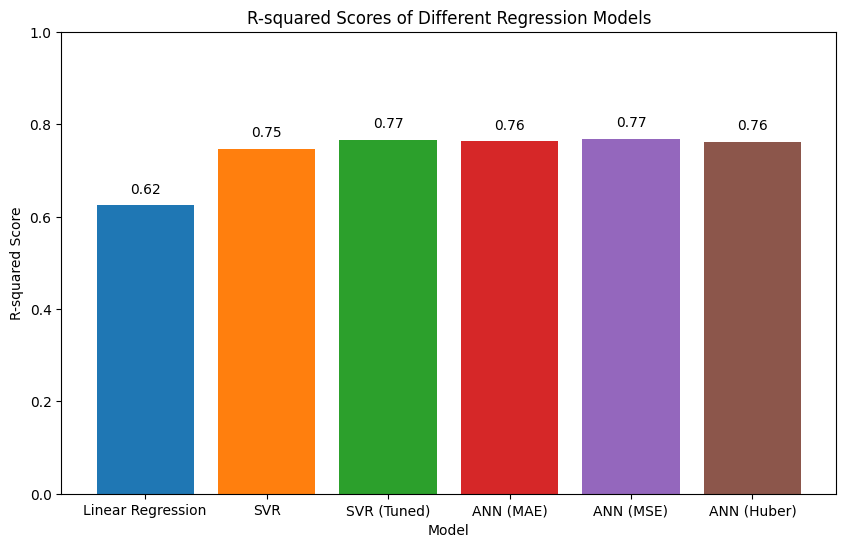

In [ ]:
models = ['Linear Regression', 'SVR', 'SVR (Tuned)', 'ANN (MAE)', 'ANN (MSE)', 'ANN (Huber)'] # Added a comma between 'SVR (Tuned)' and 'ANN (MAE)'
r2_scores = [r2_linear, r2_svr, r2_best_svr, r2_score1, r2_score2, r2_score3]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

plt.title('R-squared Scores of Different Regression Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')

plt.show()

## **Predicted vs. Actual Plot (Residual Plot)**

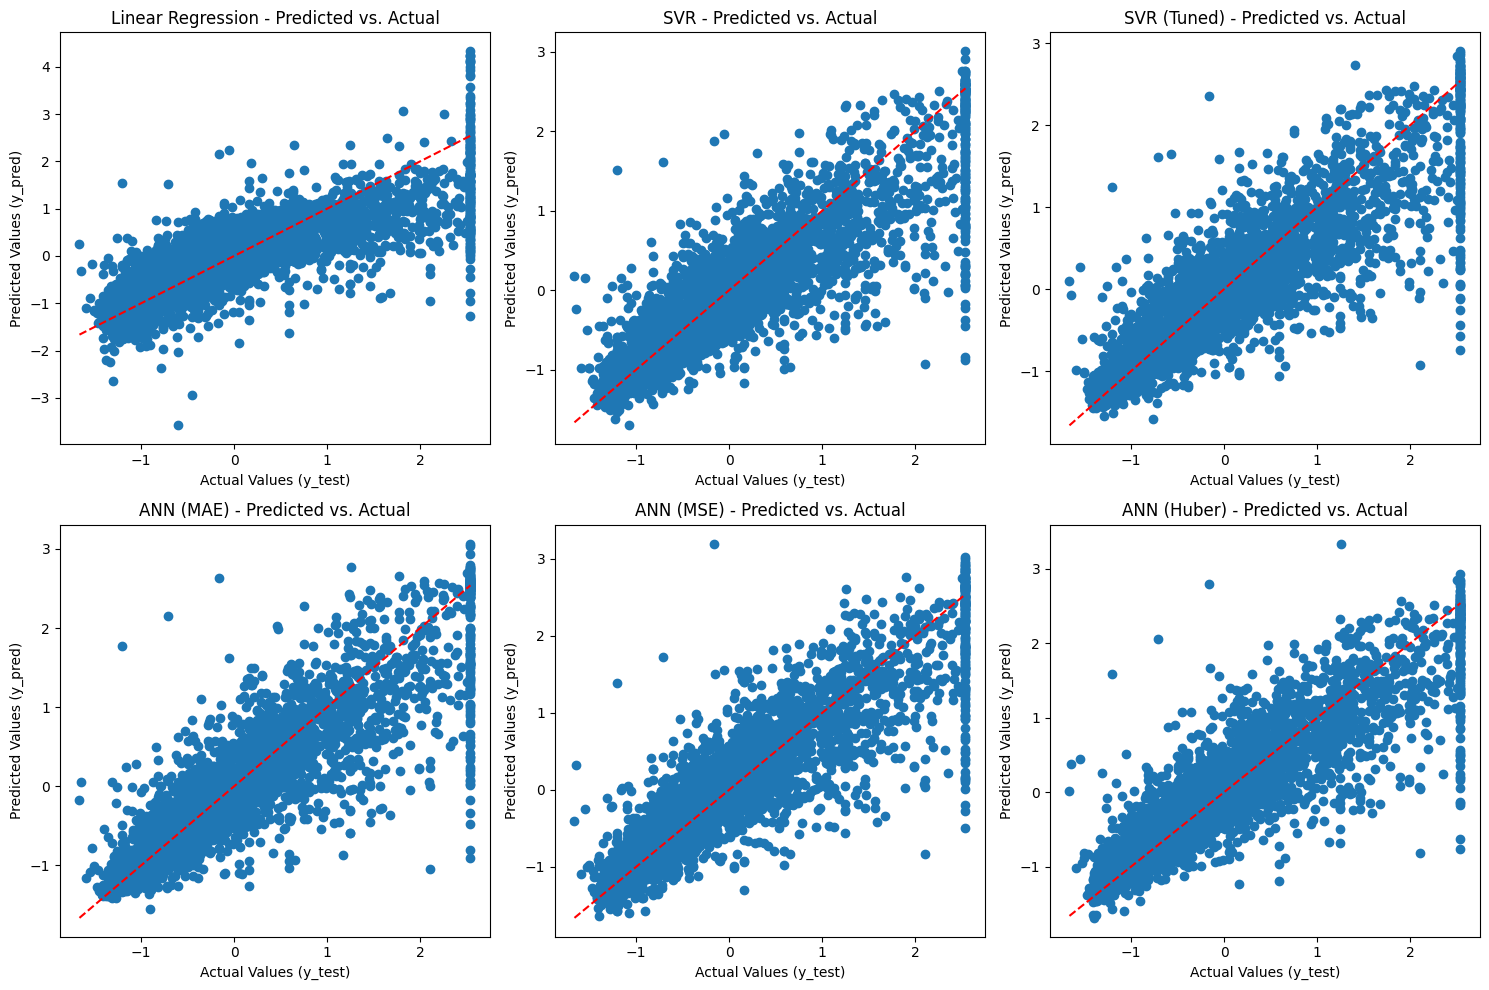

In [ ]:
import matplotlib.pyplot as plt

model_names = ['Linear Regression', 'SVR', 'SVR (Tuned)', 'ANN (MAE)', 'ANN (MSE)', 'ANN (Huber)']
y_preds = [y_pred_linear, y_pred_svr, y_best_svr_pred, y_pred_ann_mae, y_pred_ann_mse, y_pred_ann_huber]


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (model_name, y_pred) in enumerate(zip(model_names, y_preds)):
    ax = axes[i]

    ax.scatter(y_test, y_pred)
    ax.set_xlabel("Actual Values (y_test)")
    ax.set_ylabel("Predicted Values (y_pred)")
    ax.set_title(f"{model_name} - Predicted vs. Actual")
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Diagonal line

# Hide the empty subplot (if you have 5 models in a 2x3 grid)
# axes[-1].axis('off')

plt.tight_layout()
plt.show()